***Data Preprocessing***

*Import CSV files and packages*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns",100)
df=pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.shape)

(2240, 29)


**Data Cleaning**

Handling Missing Values

- Handling Missing Values
- Handling Duplicates 
- Check datatye
- Understand Dataset

Check the Null Values

In [2]:
#Listing all the columns that consist of Nan / Missing / Null Values 

features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), ' % missing values')

Income 1.07143  % missing values


**What does NaN mean?**

**Ans:** Missing Values in a DataFrame

**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MCAR type of missing values in dataset which are Missing completely at Random. 

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

In [3]:
#We are describing the columns that contains null values as well as it is a numerical column. 
#numerical columns datatype can never be object and so we are excluding it 
#descibe() function will give statistical description of the data 
df[features_with_na].select_dtypes(exclude='object').describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


### Imputing Null values

* **Impute Median value for Income column**
- **Why we are using Median instead of Mean or Mode?**
    - The median is the most informative measure of central tendency for skewed distributions or distributions with outliers. For example, the median is often used as a measure of central tendency for income distributions, which are generally highly skewed

- We can use mean as well but if dataset contains some outlier then mean of the dataset would be deviated but in case of median this doen't happens generally. 
For example: 
- Dataset: 1, 2, 3, 4, 5
Mean: 3 and Median: 3
- Dataset: 1,2,3,4,5,6,100
Mean: 17.22 and median: 4 

In [4]:
#Filling the null values inside income column with median value

df.Income.fillna(df.Income.median(), inplace=True)

In [5]:
#checking the null values of income column

df['Income'].isnull().sum()

np.int64(0)

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [6]:
df.duplicated().sum()

np.int64(0)

This shows that we do not have any duplicated row in the dataset.

**We will remove ```Z_CostContact``` and ```Z_Revenue``` columns from the dataset as contains only constant value, therefore doesn't create any variance in the dataset.**


In [7]:
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
for column in columns_to_drop:
    df.drop(column, inplace=True, axis=1)
    print(f"Column {column} is deleted")

Column ID is deleted
Column Z_CostContact is deleted
Column Z_Revenue is deleted


## Feature Extraction
- We will extract and create some of the meaningfull features.

### We'll repeat some steps from EDA
### The following code creates features that would be helpful to describe the profile of the customer 


In [8]:

from datetime import datetime

raw_df = df.copy() #saving the raw dataframe for reference


##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], dayfirst=True)
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]


### Type of Features

1. Numeric Features

In [9]:
num_features= [feature for feature in df.columns if df[feature].dtype != 'O'] 
print("There are total ", len(num_features), ' numerical features present in the dataset named: ', num_features)

There are total  21  numerical features present in the dataset named:  ['Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']


2. **Categorical Features**

In [10]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("There are total ", len(cat_features), ' categorical features present in the dataset named: ', cat_features)

There are total  0  categorical features present in the dataset named:  []


### 3. Discrete Features
- Discrete Features are features whose values are not continuous like 1.0, 1.1, 1.2, etc. 
- Criteria for categorizing a columns as discrete or continuous: 
  - If a column has less than 25 unique values it is known as discrete otherwise it is considered as continuous 

In [11]:
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print("There are total ", len(discrete_features), ' discrete columns present in the dataset named: ', discrete_features)

There are total  10  discrete columns present in the dataset named:  ['Education', 'Marital Status', 'Parental Status', 'Children', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']


### 4. Continuous Features 

In [12]:
continuous_features = [feature for feature in num_features if feature not in  discrete_features]
print("There are total ", len(continuous_features), ' continuous features present in the dataset named: ', continuous_features)

There are total  11  continuous features present in the dataset named:  ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']


 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 
 
**- We can see there are some Multicollinearity in this dataset**

### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Why IQR For Outlier Handling?**
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.





## Outliers Detection

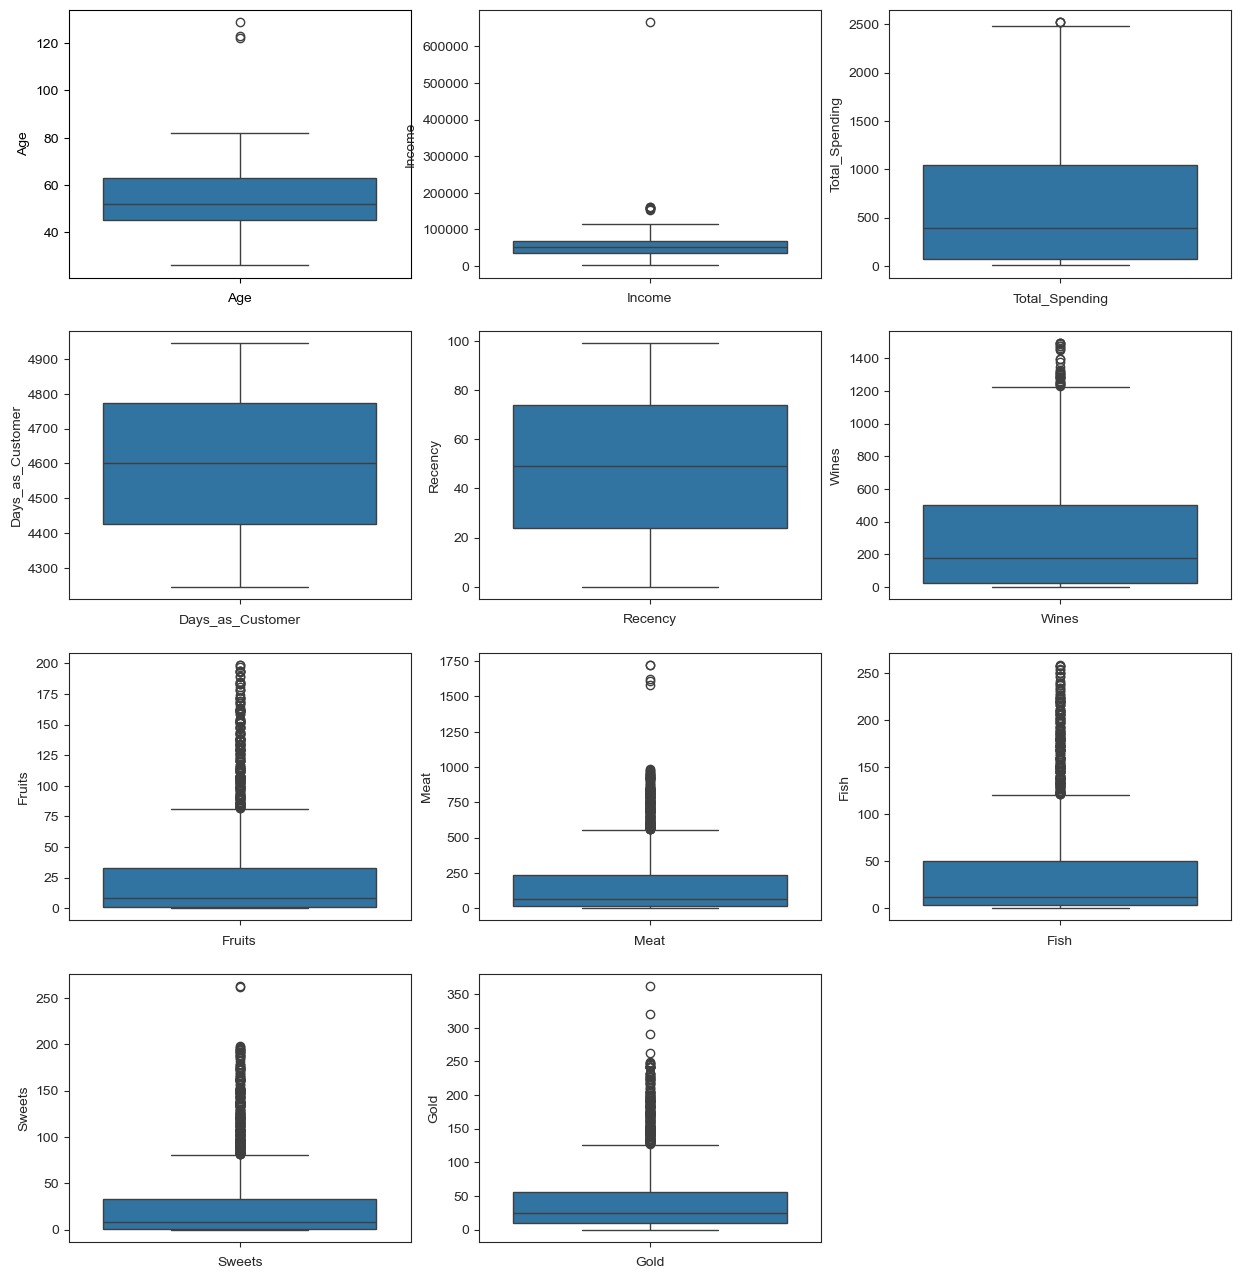

In [13]:
cont_features = continuous_features.copy()
plt.figure(figsize=(15,16)) 

for i in range(len(cont_features)):
    plt.subplot(4,3,i+1) # 6 means total 6 rows and 2 means 2 columns and i+1 means plot positions
    sns.boxplot(df[cont_features[i]])
    sns.set_style('ticks') #Axis ko numbering krega and label krega sahi s 
    plt.xlabel(cont_features[i]) # naming xaxis to all the plots 



**report**

- We can see, there are no such outliers in ```Recency``` and ```Days_as_Customer``` Column
- But there are outliers in following columns - 
    - Income
    - Wines
    - Fruits
    - Meat
    - Fish
    - Sweets
    - Gold
    - Age
    - Total Spending
- We can also see that some columns like fruits fish sweets gold has lots of outliers


**Detecting Outlier and Capping it**

In [14]:
def detect_outliers(col):
    #Finding IQR (Inter Quartile Range )
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n#', col, '#')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [15]:
for col in continuous_features:
         detect_outliers(col)


# Age #
percentile25 45.0
percentile75 63.0
Upper limit 90.0
Lower limit 18.0

# Income #
percentile25 35538.75
percentile75 68289.75
Upper limit 117416.25
Lower limit -13587.75

# Total_Spending #
percentile25 68.75
percentile75 1045.5
Upper limit 2510.625
Lower limit -1396.375

# Days_as_Customer #
percentile25 4426.75
percentile75 4775.0
Upper limit 5297.375
Lower limit 3904.375

# Recency #
percentile25 24.0
percentile75 74.0
Upper limit 149.0
Lower limit -51.0

# Wines #
percentile25 23.75
percentile75 504.25
Upper limit 1225.0
Lower limit -697.0

# Fruits #
percentile25 1.0
percentile75 33.0
Upper limit 81.0
Lower limit -47.0

# Meat #
percentile25 16.0
percentile75 232.0
Upper limit 556.0
Lower limit -308.0

# Fish #
percentile25 3.0
percentile75 50.0
Upper limit 120.5
Lower limit -67.5

# Sweets #
percentile25 1.0
percentile75 33.0
Upper limit 81.0
Lower limit -47.0

# Gold #
percentile25 9.0
percentile75 56.0
Upper limit 126.5
Lower limit -61.5


**Checking Skewness after Outlier Capping**

Checking Skewness means whether the data is balanced or is heavier on any side
The three main types
- 1️⃣ Symmetric (Skewness ≈ 0)
- 2️⃣ Right-skewed / Positively skewed (Skewness > 0)
- 3️⃣ Left-skewed / Negatively skewed (Skewness < 0)

In [16]:
df[continuous_features].skew(axis=0, skipna=True) 

Age                 0.120199
Income              0.090027
Total_Spending      0.860245
Days_as_Customer   -0.015216
Recency            -0.001987
Wines               1.096611
Fruits              1.233953
Meat                1.213585
Fish                1.230822
Sweets              1.213346
Gold                1.111307
dtype: float64

## Feature Transformation

### Scaling 
- **What is Feature Scaling**
    - Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- **Why we use feature scaling?**
    - the feature scaling was implemented to prevent any skewness in the contour plot of the cost function which affects the gradient descent but the analytical solution using normal equation does not suffer from the same drawback.


- StandardScaler
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

- PowerTransformer
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

- ColumnTransformer
Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

- SimpleImputer
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

- Pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__' .

In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [18]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
# StandardScaler: scales numerical features to have mean = 0 and standard deviation = 1
# PowerTransformer: reduces skewness and makes data more Gaussian-like using power transforms

from sklearn.compose import ColumnTransformer
# ColumnTransformer: allows applying different preprocessing steps to different feature columns

from sklearn.impute import SimpleImputer
# SimpleImputer: handles missing values by filling them using strategies like mean, median, or most_frequent

from sklearn.pipeline import Pipeline
# Pipeline: chains multiple preprocessing steps together so they are applied in a fixed, reproducible order

dataC = df.copy()

numeric_pipeline = Pipeline(steps=[("Imputer", SimpleImputer(strategy='constant', fill_value=0)),("StandardScaler", StandardScaler())])
# Here Pipeline is a class and we are calling that class
# imputer and StandardScaler is a message that we are passing and it is important to write that
outlier_features_pipeline = Pipeline(steps=[("Imputer", SimpleImputer(strategy='constant', fill_value=0)),("Transformer", PowerTransformer(standardize = True))])

preprocessor = ColumnTransformer([("numeric pipeline", numeric_pipeline, numeric_features), ("Outerlier Features Pipeline", outlier_features_pipeline, outlier_features)])

columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns=columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()



After scaling, let's have a glimpse of the scaled dataset :


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,-0.458383,-1.346874,-1.584605,-1.264505,0.299651,1.531185,0.307039,1.409304,2.510890,-0.550785,0.349414,-0.439037,0.693904,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005341,1.315365
1,-0.458383,-1.346874,0.631072,1.396361,-0.263808,-1.190545,-0.383664,-1.110409,-0.568720,-1.166125,-0.168236,-0.439037,-0.130463,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.239521,-1.441417
2,-0.458383,0.742460,-1.584605,-1.264505,0.943420,-0.205773,-0.798086,1.409304,-0.226541,1.295237,-0.685887,-0.439037,-0.542647,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.361223,0.661170
3,-0.458383,0.742460,0.631072,0.065928,-1.204881,-1.061881,-0.798086,-0.750450,-0.910898,-0.550785,-0.168236,-0.439037,0.281720,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.315014,-1.117211
4,1.533425,0.742460,0.631072,0.065928,0.307056,-0.953012,1.550305,0.329427,0.115638,0.064556,1.384715,-0.439037,-0.130463,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033428,0.179322


### Model Building ( Clustering )

We know that our dataset it unsupervised, that means we don't have such target column. So we will be using clustering algorithms first to cluster the dataset and create target levels out of it. 

- What is Clustering?
> Using a clustering algorithm means you're going to give the algorithm a lot of input data with no labels and let it find any groupings in the data it can. Those groupings are called clusters. A cluster is a group of data points that are similar to each other based on their relation to surrounding data points.

Here for Clustering Problem statement, 4 Algorithms are used.

- K-Means Clustering
- Agglomerative Clustering
- Gaussian Mixture
- DBSCAN



### Create a function for Silhouette score plot



- **What is silhouette score**

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm #cm means confusion matrix

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1,ax2) = subplots(1,2)
        fig.set_size_inches(18,7)
    
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1,1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) *10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters, **kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters

        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print("For n clusters:: ", n_clusters, "The average Silhouette score is ", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        
    

    

SyntaxError: invalid syntax (1359754347.py, line 5)